# Análisis Sintáctico Ascendente Predictivo (ASDP SLR)
---

## Conceptos

* Es un tipo de ASAP
* Dada la naturaleza inversa de la construcción del árbol, resulta conveniente introducir el concepto de reducción como contrapartida de una derivación
* Si $A \rightarrow B\beta$, entonces $\rightarrow B\beta$ puede reducirse a A, reemplazando el cuerpo de la regla por su cabeza
* Así, el parsing ascendente consiste en reducir la entrada al axioma de la GIC
* De forma equivalente, puede verse como la manera de encontrar la inversa de la derivación por la derecha de la entrada analizada
* Este analizador funciona desplazando (**shift**) símbolos leídos de la entrada hasta que en el tope de la pila queden los símbolos necesarios para realizar una reducción (**reduce**), aplicando a la inversa una de las reglas de producción de la gramática
* En ese momento, se reemplaza dichos símbolos (que coinciden con del cuerpo de la regla) por la cabeza de la regla, la cual ahora queda como nuevo tope
* El analizador en cada paso realizará una de cuatro acciones posibles:

| Acción     |    | Formato |
| --         | -- | --      |
| **shift**  | desplazar el siguiente símbolo de entrada (puntero) al tope de la pila (apilando un estado) | D(q), donde q es el estado a apilar |
| **reduce** | reducir los símbolos a partir del tope de la pila, reemplazandolos por la cabeza de la regla usada para la reducción | R(n), donde n es el número de regla. Para reducir una regla, se desapilan tantos estados como símbolos tenga la parte derecha de la regla y luego se llama al método GOTO(q, A) donde q es el estado que hay en el tope de la pila (tras desapilar los estados correspondientes) y A es la parte izquierda de la regla |
| **accept** | terminar el análisis exitosamente. Se acepta la palabra | |
| **reject** | reportar que la entrada no pudo ser analizada correctamente. Se rechaza la palabra | |

### Algoritmo de desplazamiento y reducción

* Se utiliza una pila de estados y una tabla de análisis. En función del tope de la pila y del estado actual, se pasa a otro estado o se realiza una acción (de las cuatro descritas)
* A la acción de ir a un estado se lo llama método GOTO
* Formato: GOTO(q, A), donde q es un estado y A un no terminal  (el de la parte izquierda de la producción)
* El estado es el de la pila de estados
* Cuando se hace GOTO se debe apilar el estado indicado por esta acción
* Ejemplo: GOTO(2, A) su valor en la celda es el que hay que apilar

### Ejemplo 1

$E \rightarrow E + T$

$E \rightarrow T$

$T \rightarrow T * F$

$T \rightarrow F$

$F \rightarrow (E)$

$F \rightarrow id$

1. Aumentar la GIC para armar los estados y enumerar las producciones/reglas

$\qquad X \rightarrow E$

$R1: E \rightarrow E + T$

$R2: E \rightarrow T$

$R3: T \rightarrow T * F$

$R4: T \rightarrow F$

$R5: F \rightarrow (E)$

$R6: F \rightarrow id$

2. Armar el AF canónico

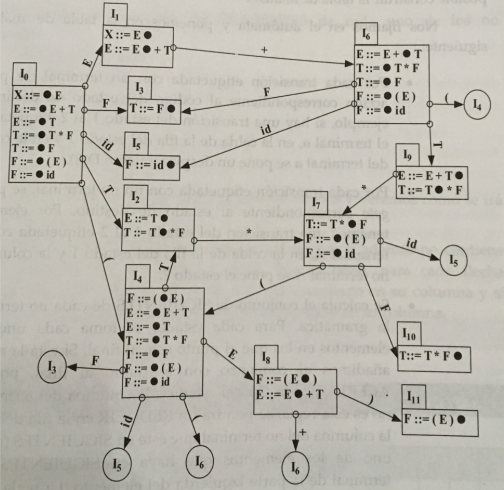

3. Armar la Tabla en base al AF

* GOTO: mirar los estados con "no terminal". Ejemplo: GOTO(0, E) =  1, GOTO(0, T) = 2, ...
* Desplazamientos: mirar los estados con "terminal". Ejemplo: D(0, '(') = 4 -> D(4)
* Reducciones:
  * Mirar los estados con "terminal"
  * Calcular el conjunto de siguientes de cada "no terminal"
    * SIG(E) = {\$, +, )}
    * SIG(T) = {\$, +, ), *}
    * SIG(F) = {\$, +, ), *}
  * Mirar las reglas que tienen un punto final
    * Ejemplo: en estado 2: E -> T.  (que es la regla 2) -> en los SIG(E) coloco la regla R(2); es decir, en \$, + y )
* Los huecos en blanco significan que si se llegan a esa celda en la tabla hay un error

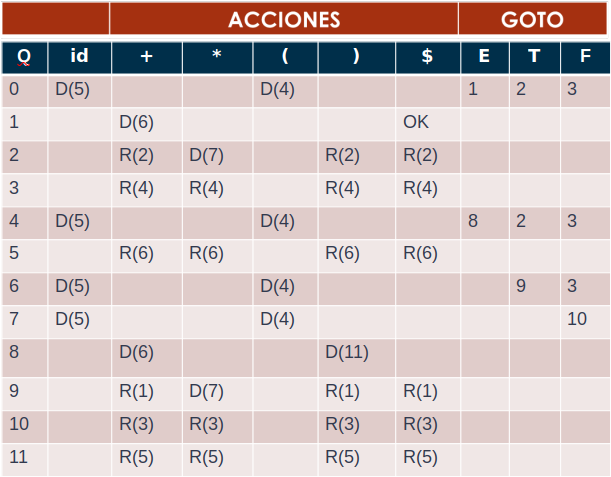

4. Armar la tabla de parsing

| Pila    | Entrada | Acción o GOTO                             |
| --      | --      | --                                        |
| 0       | id+id\$ | D(5)                                      |
| 0 5     | +id\$   | R(6)  F -> id (se desapila 1 símbolo)     |
| 0 3     | +id\$   | R(4)  T -> F (se desapila 1 símbolo)      |
| 0 2     | +id\$   | R(2)  E -> T (se desapila 1 símbolo)      |
| 0 1     | +id\$   | D(6)                                      |
| 0 1 6   | id\$    | D(5)                                      |
| 0 1 6 5 | \$      | R(6) F -> id (se desapila 1 símbolo)      |
| 0 1 6 3 | \$      | R(4) T -> F (se desapila 1 símbolo)       |
| 0 1 6 9 | \$      | R(1) E -> E + T (se desapilan 3 símbolos) |
| 0 1     | \$      | accept                                    |

### Ejemplo 2

$S \rightarrow aST$

$S \rightarrow b$

$T \rightarrow cT$

$T \rightarrow d$

| Q  | a    | b    | c    | d    | \$   | S  | T  |
| -- | --   | --   | --   | --   | --   | -- | -- |
| 0  | D(2) | D(3) |      |      |      | 1  |    |
| 1  |      |      |      |      | OK   |    |    |
| 2  | D(2) | D(3) |      |      |      | 4  |    |
| 3  |      |      | R(2) | R(2) | R(2) |    |    |
| 4  |      |      | D(6) | D(7) |      |    | 5  |
| 5  |      |      | R(1) | R(1) | R(1) |    |    |
| 6  |      |      | D(6) | D(7) |      |    | 8  |
| 7  |      |      | R(4) | R(4) | R(4) |    |    |
| 8  |      |      | R(3) | R(3) | R(3) |    |    |

| Pila        | Entrada  | Acción |
| --          | --       | --     |
| 0           | aabcdd\$ | D(2)   |
| 0 2         | abcdd\$  | D(2)   |
| 0 2 2       | bcdd\$   | D(3)   |
| 0 2 2 3     | cdd\$    | R(2)   |
| 0 2 2 4     | cdd\$    | D(6)   |
| 0 2 2 4 6   | dd\$     | D(7)   |
| 0 2 2 4 6 7 | d\$      | R(4)   |
| 0 2 2 4 6 8 | d\$      | R(3)   |
| 0 2 2 4 5   | d\$      | R(1)   |
| 0 2 4       | d\$      | D(7)   |
| 0 2 4 7     | \$       | R(4)   |
| 0 2 4 5     | \$       | R(1)   |
| 0 1         | \$       | accept |

### Ejemplo 3

$C \rightarrow AB$

$A \rightarrow a$

$B \rightarrow a$

| Q  | a    | \$   | A  | B  | C  |
| -- | --   | --   | -- | -- | -- |
| 0  | D(3) |      | 2  |    | 1  |
| 1  |      | OK   |    |    |    |
| 2  | D(5) |      |    | 4  |    |
| 3  | R(2) |      |    |    |    |
| 4  |      | R(1) |    |    |    |
| 5  |      | R(3) |    |    |    |

| Pila  | Entrada | Acción |
| --    | --      | --     |
| 0     | aa\$    | D(3)   |
| 0 3   | a\$     | R(2)   |
| 0 2   | a\$     | D(5)   |
| 0 2 5 | \$      | R(3)   |
| 0 2 4 | \$      | R(1)   |
| 0 1   | \$      | accept |

### Ejemplo 4

$E \rightarrow id + E$

$E \rightarrow id$

| Q  | id   | \+   | $    | E  |
| -- | --   | --   | --   | -- |
| 0  | D(2) |      |      | 1  |
| 1  |      |      | OK   |    |
| 2  |      | D(3) | R(2) |    |
| 3  | D(2) |      |      | 4  |
| 4  |      |      | R(1) |    |

| Pila    | Entrada | Acción |
| --      | --      | --     |
| 0       | id+id\$ | D(2)   |
| 0 2     | +id\$   | D(3)   |
| 0 2 3   | id\$    | D(2)   |
| 0 2 3 2 | \$      | R(2)   |
| 0 2 3 4 | \$      | R(1)   |
| 0 1     | \$      | accept |

### Ejemplo 5

$S \rightarrow aABe$

$A \rightarrow Abc$

$A \rightarrow b$

$B \rightarrow d$

  | Q  | a    | b    | c    | d    | e    | \$   |  S | A  | B  |
  | -- | --   | --   | --   | --   | --   | --   | -- | -- | -- |
  | 0  | D(2) |      |      |      |      |      | 1  |    |    |
  | 1  |      |      |      |      |      | OK   |    |    |    |
  | 2  |      | D(4) |      |      |      |      |    | 3  |    |
  | 3  |      | D(6) |      | D(7) |      |      |    |    | 5  |
  | 4  |      | R(3) |      | R(3) |      |      |    |    |    |
  | 5  |      |      |      |      | D(8) |      |    |    |    |
  | 6  |      |      | D(9) |      |      |      |    |    |    |
  | 7  |      |      |      |      | R(4) |      |    |    |    |
  | 8  |      |      |      |      |      | R(1) |    |    |    |
  | 9  |      | R(2) |      |      | R(2) |      |    |    |    |

| Pila      | Entrada | Acción |
| --        | --      | --     |
| 0         | abde\$  | D(2)   |
| 0 2       | bde\$   | D(4)   |
| 0 2 4     | de\$    | R(3)   |
| 0 2 3     | de\$    | D(7)   |
| 0 2 3 7   | e\$     | R(4)   |
| 0 2 3 5   | e\$     | D(8)   |
| 0 2 3 5 8 | \$      | R(1)   |
| 0 1       | \$      | accept |

### Ejemplo 6

$S \rightarrow (L)$

$S \rightarrow id$

$L \rightarrow SL’$

$L’ \rightarrow ,SL’$

$L’ \rightarrow \lambda$

| Q  | (    | )    | id   | ,    | \$   | S  | L  | L' |
| -- | --   | --   | --   | --   | --   | -- | -- | -- |
| 0  | D(2) |      | D(3) |      |      | 1  |    |    |
| 1  |      |      |      |      | OK   |    |    |    |
| 2  | D(2) |      | D(3) |      |      | 5  | 4  |    |
| 3  |      | R(2) |      | R(2) | R(2) |    |    |    |
| 4  |      | D(6) |      |      |      |    |    |    |
| 5  |      | R(5) |      | D(8) |      |    |    | 7  |
| 6  |      | R(1) |      | R(1) | R(1) |    |    |    |
| 7  |      | R(3) |      |      |      |    |    |    |
| 8  | D(2) |      | D(3) |      |      | 9  |    |    |
| 9  |      | R(5) |      | D(8) |      |    |    | 10 |
| 10 |      | R(4) |      |      |      |    |    |    |

| Pila    | Entrada | Acción |
| --      | --      | --     |
| 0       | (id)\$  | D(2)   |
| 0 2     | id)\$   | D(3)   |
| 0 2 3   | )\$     | R(2)   |
| 0 2 5   | )\$     | R(5)   |
| 0 2 5 7 | )\$     | R(3)   |
| 0 2 4   | )\$     | D(6)   |
| 0 2 4 6 | \$      | R(1)   |
| 0 1     | \$      | accept |

## Conflictos en las tablas SLR

* Hay dos posibles conflictos a la hora de construir una tabla SLR:

| Conflicto                    | Problema | Solución |
| --                           | -- | -- |
| **Desplazamiento-reducción** | se produce cuando en una misma celda se puede poner un desplazamiento y una reducción. Esto significa que la GIC no es SLR | se puede resolver una de las dos opciones adecuada para que el analizador reconozca el lenguaje descrito por la GIC |
| **Reducción-reducción**      | aparece cuando en una misma celda es posible reducir de dos maneras diferentes. Esto también implica que la GIC no es SLR | elegir una de las dos reducciones, teniendo cuidado de que el analizador reconozca bien el lenguaje definido por la GIC. También se puede optar por modificar la GIC para que eso no ocurra |